## Exploratory Data Analysis on Car Sales

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

### Data Loading

In [2]:
car_df = pd.read_csv('car_sales.csv')

In [3]:
car_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Data Cleaning

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
car_df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
car_df = car_df.dropna()
car_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [7]:
car_df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
 8   Model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


In [9]:
car_df['Car Name'] = car_df['Brand'] + ' ' + car_df['Model']
car_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Car Name
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,BMW 320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,Mercedes-Benz Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,Mercedes-Benz S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,Audi Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,Toyota Rav 4


### Exploratory Data Analysis (EDA)

#### Q1: Which is the most preferred brand?

In [10]:
most_brand = car_df['Brand'].value_counts()
print('{} is the most preferred brand'.format(most_brand.idxmax()))

Volkswagen is the most preferred brand


#### Q2: Top 10 cars sold at highest price? 

In [11]:
top_car = car_df.groupby('Car Name').max().sort_values('Price', ascending=False)
top_car = top_car[:10]
top_car

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
Car Name,,,,,,,,,
Mercedes-Benz S 600,Mercedes-Benz,300000.0,sedan,246,6.0,Petrol,yes,2011,S 600
Mercedes-Benz G 500,Mercedes-Benz,300000.0,other,254,5.5,Petrol,yes,2013,G 500
Mercedes-Benz S-Guard,Mercedes-Benz,295000.0,sedan,29,6.0,Petrol,yes,2011,S-Guard
Mercedes-Benz S 63 AMG,Mercedes-Benz,250000.0,sedan,95,6.3,Petrol,yes,2016,S 63 AMG
Mercedes-Benz G 63 AMG,Mercedes-Benz,219900.0,crossover,99,6.3,Petrol,yes,2016,G 63 AMG
Mercedes-Benz Sprinter 324,Mercedes-Benz,200000.0,van,19,3.5,Petrol,yes,2013,Sprinter 324
Mercedes-Benz GLS 63,Mercedes-Benz,199999.0,crossover,2,5.5,Petrol,yes,2016,GLS 63
Toyota Land Cruiser 200,Toyota,195000.0,other,810,5.7,Petrol,yes,2016,Land Cruiser 200
Mercedes-Benz S 500,Mercedes-Benz,189999.0,sedan,423,6.2,Petrol,yes,2016,S 500


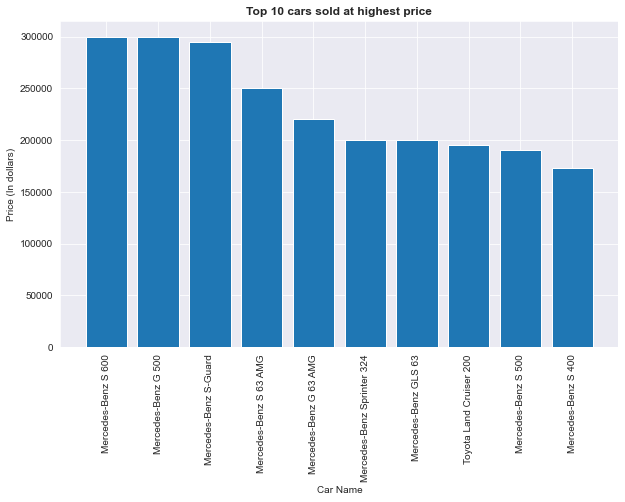

In [12]:
plt.figure(figsize=(10,6))
plt.bar(top_car.index, top_car.Price)
plt.xticks(rotation = 90)
plt.title('Top 10 cars sold at highest price', fontweight='bold')
plt.xlabel('Car Name')
plt.ylabel('Price (In dollars)')
plt.show()

#### Q3: Which is the highest selling car?

In [13]:
high_car = car_df['Car Name'].value_counts()
high_sell = high_car.idxmax()
sell = high_car.max()

In [14]:
print('{} is the highest selling car with {} sales'.format(high_sell,sell))

Mercedes-Benz E-Class is the highest selling car with 188 sales


#### Q4: Which year has maximum sales of car?

In [18]:
max_year = car_df['Year'].value_counts()
print('Maximum cars sold in {}'.format(max_year.idxmax()))

Maximum cars sold in 2008


#### Q5: Distribution of total sales of each brand?

In [15]:
total_brand = car_df.groupby(['Brand'])[['Price']].sum()
total_brand

,Price
Brand,
Audi,7940770.00
BMW,15134836.25
Mercedes-Benz,25369636.00
Mitsubishi,3500830.30
Renault,3589669.92
Toyota,11614109.21
Volkswagen,11548188.28


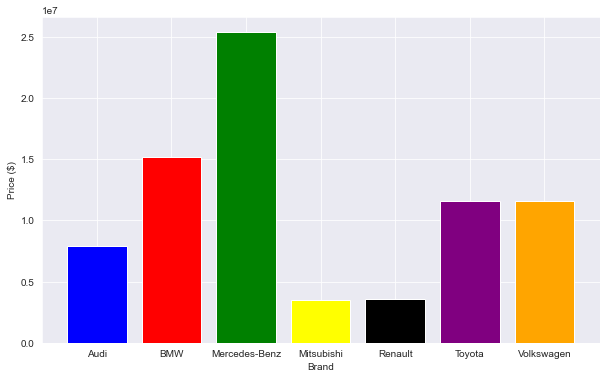

In [16]:
plt.figure(figsize=(10,6))
colors = ['blue','red','green','yellow','black','purple','orange']
plt.bar(total_brand.index, total_brand.Price, color=colors)
plt.ylabel('Price ($)')
plt.xlabel('Brand')
plt.show()

#### Q6: How many BMW cars were sold in year 2008? 

In [17]:
bmw_car = car_df[(car_df['Brand'] == 'BMW') & (car_df['Year'] == 2008)]['Car Name'].count()
print('Total {} BMW cars are sold in 2008'.format(bmw_car))

Total 35 BMW cars are sold in 2008


#### Q7: In which year maximum Audi cars are sold? 

In [18]:
audi_car = car_df[car_df['Brand'] == 'Audi']
max_audi_year = audi_car.groupby('Year')['Car Name'].count()
print("The maximum Audi cars are sold in {} with total {} sales".format(max_audi_year.idxmax(), max_audi_year.max()))

The maximum Audi cars are sold in 2007 with total 28 sales


#### Q8: How many cars are sold of each body type? 

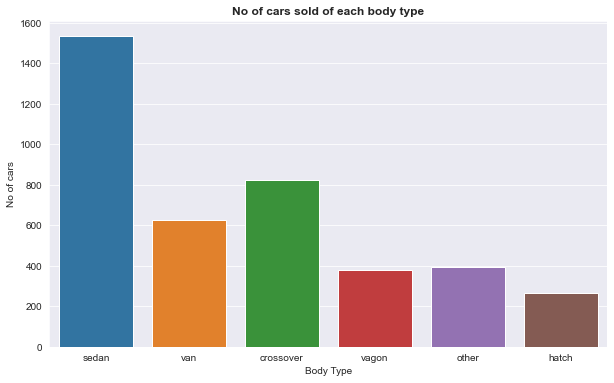

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='Body', data=car_df)
plt.title('No of cars sold of each body type', fontweight='bold')
plt.xlabel('Body Type')
plt.ylabel('No of cars')
plt.show()

#### Q9: Total number of registered cars? 

In [20]:
register_cars = car_df[car_df['Registration'] == 'yes']['Car Name'].count()
print('Total {} cars are registered'.format(register_cars))

Total 3654 cars are registered


#### Q10: How many registered cars are sold of body type crossover? 

In [21]:
body_cross = car_df[car_df['Body'] == 'crossover']['Car Name'].count()
reg_cross = car_df[(car_df['Body'] == 'crossover') & (car_df['Registration'] == 'yes')]['Car Name'].count()
print('Total {} cars are sold of body type crossover of which {} are registered'.format(body_cross, reg_cross))

Total 824 cars are sold of body type crossover of which 795 are registered


#### Q11: How many registered cars are sold of body type sedan?

In [22]:
body_sedan = car_df[car_df['Body'] == 'sedan']['Car Name'].count()
reg_sedan = car_df[(car_df['Body'] == 'sedan') & (car_df['Registration'] == 'yes')]['Car Name'].count()
print('Total {} cars are sold of body type sedan of which {} are registered'.format(body_sedan, reg_sedan))

Total 1534 cars are sold of body type sedan of which 1360 are registered


#### Q12: Top 10 cars sold at highest price of body type sedan? 

In [23]:
car_sedan = car_df[car_df['Body'] == 'sedan']
top_body_sedan = car_sedan.groupby('Car Name').max().sort_values('Price', ascending=False)
top_body_sedan = top_body_sedan[:10]
top_body_sedan

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
Car Name,,,,,,,,,
Mercedes-Benz S 600,Mercedes-Benz,300000.0,sedan,246,6.0,Petrol,yes,2011,S 600
Mercedes-Benz S-Guard,Mercedes-Benz,295000.0,sedan,29,6.0,Petrol,yes,2011,S-Guard
Mercedes-Benz S 350,Mercedes-Benz,144900.0,sedan,280,3.8,Petrol,yes,2015,S 350
Mercedes-Benz S 500,Mercedes-Benz,135555.0,sedan,423,6.2,Petrol,yes,2015,S 500
BMW 750,BMW,129222.0,sedan,386,5.0,Petrol,yes,2016,750
BMW 730,BMW,112000.0,sedan,448,3.0,Petrol,yes,2015,730
Mercedes-Benz CLS 400,Mercedes-Benz,99000.0,sedan,0,3.0,Petrol,yes,2016,CLS 400
Audi A8,Audi,90999.0,sedan,374,6.3,Petrol,yes,2015,A8
BMW 6 Series Gran Coupe,BMW,85555.0,sedan,10,3.0,Other,yes,2015,6 Series Gran Coupe


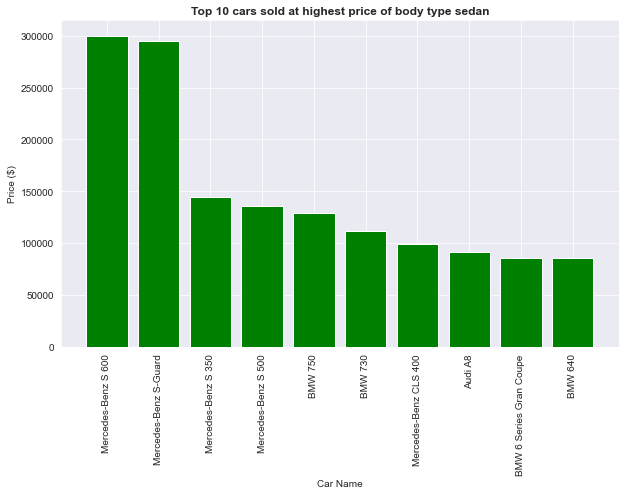

In [24]:
plt.figure(figsize=(10,6))
plt.bar(top_body_sedan.index, top_body_sedan.Price, color='g')
plt.title('Top 10 cars sold at highest price of body type sedan', fontweight='bold')
plt.xlabel('Car Name')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)
plt.show()

#### Q13: Which Engine type is most preferred? 

In [25]:
val_eng = car_df['Engine Type'].value_counts()
max_engine = val_eng.idxmax()
print("The most preferred engine type is {}".format(max_engine))

The most preferred engine type is Diesel


#### Q14: How many registered cars are sold of engine type petrol? 

In [26]:
eng_petrol = car_df[car_df['Engine Type'] == 'Petrol']['Car Name'].count()
reg_petrol = car_df[(car_df['Engine Type'] == 'Petrol') & (car_df['Registration'] == 'yes')]['Car Name'].count()
print('Total {} cars are sold of engine type petrol of which {} are registered'.format(eng_petrol, reg_petrol))

Total 1468 cars are sold of engine type petrol of which 1393 are registered


#### Q15: On which Price Range, most of the cars are sold?

In [27]:
price_range = car_df.groupby('Price')[['Car Name']].count()
price_range.sort_values('Car Name', ascending=False)

,Car Name
Price,
6500.0,40
8500.0,37
10500.0,35
9500.0,34
7500.0,34
...,...
31800.0,1
31700.0,1
31600.0,1


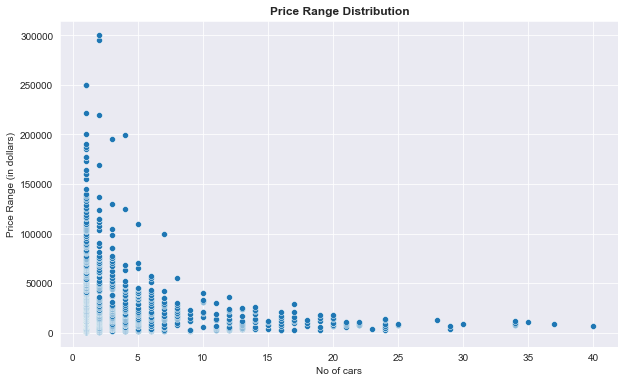

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = price_range['Car Name'], y = price_range.index)
plt.title('Price Range Distribution', fontweight='bold')
plt.xlabel('No of cars')
plt.ylabel('Price Range (in dollars)')
plt.show()

As it can be obtained from the above graph that, most of the cars are sold at price below $50000

#### Q16: Is there any relationship between Price and Mileage?

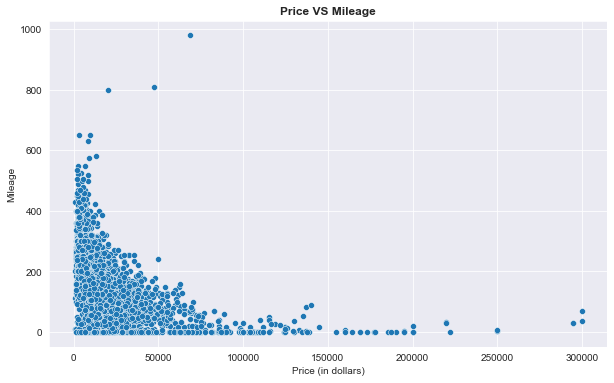

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = car_df.Price, y= car_df.Mileage)
plt.title('Price VS Mileage', fontweight = 'bold')
plt.xlabel('Price (in dollars)')
plt.ylabel('Mileage')
plt.show()

As we can observe there is a negative relation between the Price and Mileage of the car.

Most of the cars of lower price range (below 100000 dollars) has higher mileage and cars with higher price range (above 150000 dollars) has lower mileage.



#### Q17: Relationship between Price and Year?

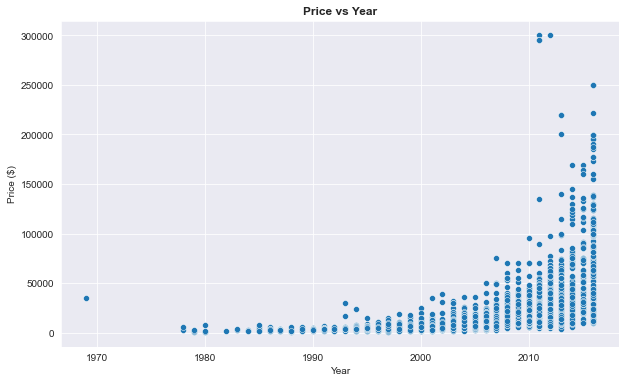

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=car_df.Year, y=car_df.Price)
plt.title('Price vs Year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.show()

It can be observed that as the year increases price also increases.

### Inferences and Conclusion

#### From the above analysis and visualizations, we can conclude that:
     •	The largest number of cars were sold in 2008
     •	Most of the cars that sold at highest price are of brand Mercedes-Benz.
     •	Most cars have diesel as its fuel.
     •	Body type ‘sedan’ has the most number of count whereas ‘hatch’ has the least. Crossover was found to be second 
         favorite body type.
     •	Although Volkswagen is the most preferred brand the highest selling i.e., the car sold at maximum times is of 
         Mercedes-Benz.
   